In [1]:
from MLP import *
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [102]:
sc = StandardScaler()
data = datasets.load_iris()
X = data.data
y = data.target
y = OneHotEncoder(sparse=False).fit_transform(y.reshape((-1, 1)))
print("{} {}".format(X.shape, y.shape))

(150, 4) (150, 3)


In [103]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=43)
mlp_iris = MultiLayerPerceptron(np.array([4, 5, 3]), 'crossentropy', 'sigmoid')

In [104]:
mlp_iris.learn(sc.fit_transform(x_train), y_train, 0.1, 1000)

100%|███████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.39it/s, loss=0.00153, accuracy=1]


In [105]:
y_pred = mlp_iris.predictAll(sc.fit_transform(x_test), softmax=True)
print(x_train.shape, y_train.shape)
y_pred = (y_pred == y_pred.max(axis=1)[:, None]).astype(int)
print(metrics.accuracy_score(y_test, y_pred)*100)

(45, 4) (45, 3)
96.19047619047619


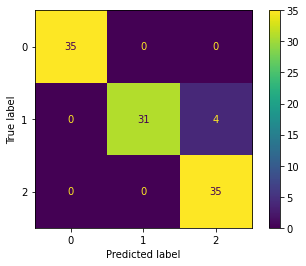

In [106]:
yy_pred = np.argmax(y_pred,axis=1)
yy_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(yy_test, yy_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

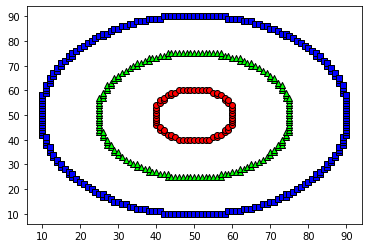

In [191]:
N = 100
center = int(N/2)
Y, X = np.ogrid[:N, :N]
circle = np.sqrt((X - center)**2 + (Y - center)**2).astype(int)
a = np.zeros((N, N))
a[circle==10] = 1
a[circle==25] = 2
a[circle==40] = 3

NN = 200
XX = np.linspace(0, N, NN)
XX = np.array(np.meshgrid(XX, XX)).T.reshape(-1,2)

X = np.argwhere(a==1)
y = np.zeros(X.shape[0])
X = np.append(X, np.argwhere(a==2), axis=0)
y = np.append(y, np.ones(len(np.argwhere(a==2))))
X = np.append(X, np.argwhere(a==3), axis=0)
y = np.append(y, 2*np.ones(len(np.argwhere(a==3))))

plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o', edgecolors=(0, 0, 0, 1), color=(1, 0, 0, 1))
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='^', edgecolors=(0, 0, 0, 1), color=(0, 1, 0, 1))
plt.scatter(X[y == 2, 0], X[y == 2, 1], marker='s', edgecolors=(0, 0, 0, 1), color=(0, 0, 1, 1))

In [192]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
x_train2 = np.append(x_train, XX, axis=0)
x_train2 = sc.fit_transform(x_train2)
x_train2 = x_train2[:-XX.shape[0]]
y_train2 = OneHotEncoder(sparse=False).fit_transform(y_train.reshape((-1, 1)))
mlp = MultiLayerPerceptron(np.array([2, 5, 5, 3]), 'crossentropy', 'sigmoid')

In [193]:
mlp.learn(x_train2, y_train2, .1, 200)

100%|███████████████████████████████████████████████████████| 200/200 [00:20<00:00,  9.73it/s, loss=0.0013, accuracy=1]


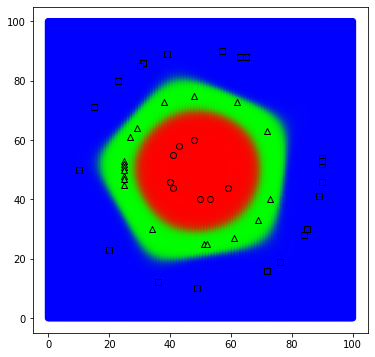

In [196]:
yy = mlp.predictAll(sc.fit_transform(XX), softmax=True)
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_size_inches(6, 6)
# yy = (yy == yy.max(axis=1)[:, None]).astype(int)

ax.scatter(XX[:, 0], XX[:, 1], marker='o', color=yy)
ax.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], marker='o', edgecolors=(0, 0, 0, 1), color=(1, 0, 0, 1))
ax.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], marker='^', edgecolors=(0, 0, 0, 1), color=(0, 1, 0, 1))
ax.scatter(x_test[y_test == 2, 0], x_test[y_test == 2, 1], marker='s', edgecolors=(0, 0, 0, 1), color=(0, 0, 1, 1))